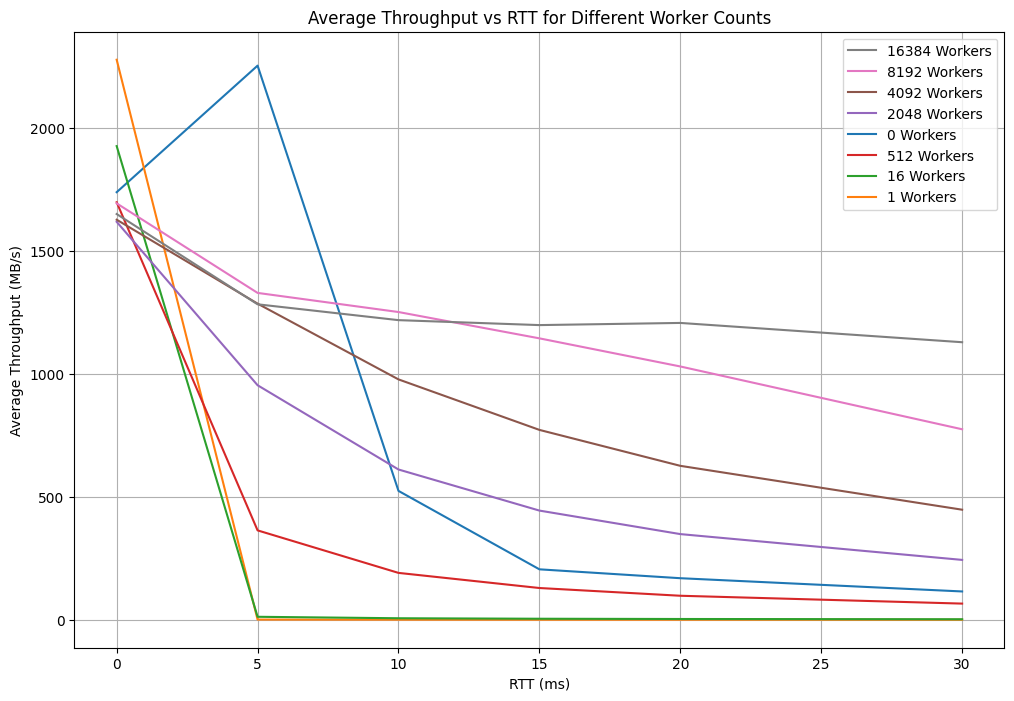

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../bench/throughput-workervar/results.csv')

# Forward fill missing values in 'RTT (ms)' and 'Worker'
data['RTT (ms)'] = data['RTT (ms)'].ffill()
data['Worker'] = data['Worker'].ffill()

# Convert the RTT from string to integer for better plotting
data['RTT (ms)'] = data['RTT (ms)'].str.replace('ms', '').astype(int)

# Group by 'RTT (ms)' and 'Worker' and calculate average throughput
average_throughput_per_worker = data.groupby(['RTT (ms)', 'Worker'])['Throughput for Managed Mounts (MB/s)'].mean()

# Reset the index for plotting
average_throughput_per_worker = average_throughput_per_worker.reset_index()

# Use a colormap to ensure distinct colors for each line
cmap = plt.get_cmap('tab10')

# Create a plot
plt.figure(figsize=(12, 8))

# Empty list to store lines and labels for the legend
lines = []
labels = []

# For each worker, plot a line
for i, worker in enumerate(average_throughput_per_worker['Worker'].unique()):
    subset = average_throughput_per_worker[average_throughput_per_worker['Worker'] == worker]
    line, = plt.plot(subset['RTT (ms)'], subset['Throughput for Managed Mounts (MB/s)'], color=cmap(i % cmap.N))

    # Store lines and labels
    lines.append(line)
    labels.append(f'{int(worker)} Workers')

# Sort the lines and labels based on the last y-value of each line
sorted_lines_labels = sorted(zip(lines, labels), key=lambda x: x[0].get_ydata()[-1], reverse=True)

# Unzip lines and labels
lines, labels = zip(*sorted_lines_labels)

# Set title and labels
plt.title('Average Throughput vs RTT for Different Worker Counts')
plt.xlabel('RTT (ms)')
plt.ylabel('Average Throughput (MB/s)')

# Add a legend in the top right corner
plt.legend(lines, labels, loc='upper right')

# Show the plot
plt.grid(True)
plt.show()